In [1]:
!pip install scikit_posthocs

In [32]:
import pandas as pd
import os

# --- Langkah 1: Konfigurasi Nama File ---
# Definisikan nama-nama varian dan horizon yang akan dibaca.
VARIANTS = [
    "baseline",
    "holiday",
    "cuaca",
    "Holiday-Cuaca"
]
HORIZONS = ["1d", "7d", "30d"]

# Buat dictionary kosong untuk menampung DataFrame yang dibaca
all_dataframes = {}

print("--- Langkah 1: Membaca semua file metrik ---")

# --- Langkah 2: Membaca Semua File dengan Perulangan ---
for varian in VARIANTS:
    for horizon in HORIZONS:
        file_name = f"fold_metrics_{varian}_{horizon}.xlsx"
        df_name = f"{varian}_{horizon}"
        
        try:
            df = pd.read_excel(file_name)
            all_dataframes[df_name] = df
            print(f"✅ Berhasil memuat: {file_name}")
        except FileNotFoundError:
            print(f"⚠️ GAGAL: File '{file_name}' tidak ditemukan. Dilewati.")

print("\n--- Proses pembacaan selesai ---")

# --- Langkah 3: Proses Data HANYA jika ada file yang berhasil dibaca ---
if all_dataframes:
    # --- A. Membuat DataFrame Global (Format Panjang) ---
    print("\n--- Langkah 2: Membuat DataFrame Global 'df_performance' ---")
    list_for_global_df = []
    for df_name, df_data in all_dataframes.items():
        temp_df = df_data.copy()
        parts = df_name.split('_')
        horizon_label = parts[-1]
        varian_label = '_'.join(parts[:-1])
        
        temp_df['varian'] = varian_label
        temp_df['horizon'] = horizon_label
        list_for_global_df.append(temp_df)

    df_performance = pd.concat(list_for_global_df, ignore_index=True)
    print("✅ DataFrame global `df_performance` berhasil dibuat.")

    # --- B. Membuat DataFrame per Horizon (Format Lebar) ---
    print("\n--- Langkah 3: Membuat DataFrame Format Lebar per Horizon ---")
    
    # Dictionary sementara untuk menyimpan hasil
    wide_horizon_dfs = {}
    
    for horizon in HORIZONS:
        # Filter data untuk horizon yang sedang diproses
        df_subset = df_performance[df_performance['horizon'] == horizon]
        
        if not df_subset.empty:
            # 'Putar' tabel menggunakan pivot_table
            df_wide = df_subset.pivot_table(
                index='cutoff',      # Baris akan menjadi setiap tanggal cutoff
                columns='varian',    # Kolom akan menjadi setiap varian model
                values='RMSE'        # Nilai di dalam tabel adalah RMSE
            )
            # Membersihkan nama indeks kolom
            # Rename label kolom jika ada varian yang perlu diubah
            df_wide = df_wide.rename(columns={
                'baseline': 'Baseline',
                'holiday': 'Holiday',
                'cuaca': 'Cuaca',
                'Holiday-Cuaca': 'Holiday + Cuaca'
            })
            
            df_performance['varian'] = df_performance['varian'].replace({
                'baseline': 'Baseline',
                'holiday': 'Holiday',
                'cuaca': 'Cuaca',
                'Holiday-Cuaca': 'Holiday + Cuaca'
            })
            df_wide = df_wide.rename_axis(columns=None).reset_index()
            wide_horizon_dfs[f'df_horizon_{horizon}'] = df_wide
            print(f"✅ DataFrame format lebar 'df_horizon_{horizon}' berhasil dibuat.")
        else:
            # Buat DataFrame kosong jika tidak ada data untuk horizon ini
            wide_horizon_dfs[f'df_horizon_{horizon}'] = pd.DataFrame()
            print(f"⚠️ Tidak ada data untuk membuat DataFrame format lebar untuk horizon {horizon}.")

    # --- C. Ekstrak ke Variabel Global (sesuai permintaan "di luar collection") ---
    df_horizon_1d = wide_horizon_dfs.get('df_horizon_1d', pd.DataFrame())
    df_horizon_7d = wide_horizon_dfs.get('df_horizon_7d', pd.DataFrame())
    df_horizon_30d = wide_horizon_dfs.get('df_horizon_30d', pd.DataFrame())

    # --- Langkah 4: Tampilkan Hasil Akhir ---
    print("\n\n--- HASIL AKHIR (DataFrame Format Lebar) ---")
    display(df_horizon_1d)
    display(df_horizon_7d)
    display(df_horizon_30d)
    display(df_performance)

else:
    print("\n⚠️ Tidak ada data yang berhasil dibaca, semua proses pengolahan data dibatalkan.")

--- Langkah 1: Membaca semua file metrik ---
✅ Berhasil memuat: fold_metrics_baseline_1d.xlsx
✅ Berhasil memuat: fold_metrics_baseline_7d.xlsx
✅ Berhasil memuat: fold_metrics_baseline_30d.xlsx
✅ Berhasil memuat: fold_metrics_holiday_1d.xlsx
✅ Berhasil memuat: fold_metrics_holiday_7d.xlsx
✅ Berhasil memuat: fold_metrics_holiday_30d.xlsx
✅ Berhasil memuat: fold_metrics_cuaca_1d.xlsx
✅ Berhasil memuat: fold_metrics_cuaca_7d.xlsx
✅ Berhasil memuat: fold_metrics_cuaca_30d.xlsx
✅ Berhasil memuat: fold_metrics_Holiday-Cuaca_1d.xlsx
✅ Berhasil memuat: fold_metrics_Holiday-Cuaca_7d.xlsx
✅ Berhasil memuat: fold_metrics_Holiday-Cuaca_30d.xlsx

--- Proses pembacaan selesai ---

--- Langkah 2: Membuat DataFrame Global 'df_performance' ---
✅ DataFrame global `df_performance` berhasil dibuat.

--- Langkah 3: Membuat DataFrame Format Lebar per Horizon ---
✅ DataFrame format lebar 'df_horizon_1d' berhasil dibuat.
✅ DataFrame format lebar 'df_horizon_7d' berhasil dibuat.
✅ DataFrame format lebar 'df_hor

,cutoff,Holiday + Cuaca,Baseline,Cuaca,Holiday
0,2025-03-31,17768.375467,16603.951101,18517.526967,16492.447754
1,2025-04-01,23838.852335,17760.681207,18985.823875,20444.380780
2,2025-04-02,28030.802982,22600.770354,23009.669075,24940.182231
3,2025-04-03,27273.223547,22460.243633,22219.818610,24349.767830
4,2025-04-04,2748.030981,2525.622434,2534.325503,670.593571
...,...,...,...,...,...
56,2025-05-26,11327.495420,9075.419219,8756.606589,13556.447086
57,2025-05-27,11046.506390,7001.064243,6589.443847,11713.735587
58,2025-05-28,15505.415660,6369.106630,7739.103520,14267.361675
59,2025-05-29,10473.444228,5838.863298,6917.993905,9242.711692


,cutoff,Baseline,Cuaca,Holiday,Holiday + Cuaca
0,2025-03-31,16009.725842,19711.502578,15472.134541,19798.898748
1,2025-04-01,13975.561132,17127.619293,14581.767167,18394.565358
2,2025-04-02,13051.650121,14815.553148,13411.907932,16151.944149
3,2025-04-03,12450.148739,11875.135135,12552.409952,12991.545540
4,2025-04-04,11784.296605,8838.950588,11696.758992,10174.393543
5,2025-04-05,14276.391449,10158.601554,14508.242595,10610.283433
6,2025-04-06,17423.938556,12779.962453,17735.550200,13315.071061
7,2025-04-07,20548.520999,15648.994621,20517.909196,16324.437522
8,2025-04-08,22769.654428,18340.553900,23061.124735,18233.257828
9,2025-04-09,23931.751697,18929.373464,24132.495635,18653.429327


,cutoff,Baseline,Cuaca,Holiday,Holiday + Cuaca
0,2025-03-31,32292.378112,33787.061187,32675.553340,33345.377659
1,2025-04-01,31599.545403,32487.593347,31890.356033,32475.722043
2,2025-04-02,30874.047814,31036.704430,30975.190478,30670.842724
3,2025-04-03,29563.906097,29109.952978,30237.312214,28731.670744
4,2025-04-04,28408.865223,27370.779756,29215.324176,27018.773079
5,2025-04-05,28280.888751,26691.475827,28958.150035,26884.851373
6,2025-04-06,28219.014601,26349.465479,29183.368448,26138.534787
7,2025-04-07,28117.752816,25908.087870,28720.574834,25760.714228
8,2025-04-08,27630.675224,25465.873014,28426.109436,25440.522924
9,2025-04-09,27123.245418,24784.297602,27750.579111,25070.585131


,cutoff,RMSE,MAPE,varian,horizon
0,2025-03-31,16603.951101,22.437772,Baseline,1d
1,2025-04-01,17760.681207,24.000921,Baseline,1d
2,2025-04-02,22600.770354,28.975347,Baseline,1d
3,2025-04-03,22460.243633,28.795184,Baseline,1d
4,2025-04-04,2525.622434,4.659820,Baseline,1d
...,...,...,...,...,...
587,2025-04-27,9702.301088,32.067208,Holiday + Cuaca,30d
588,2025-04-28,9846.745861,33.199545,Holiday + Cuaca,30d
589,2025-04-29,9882.181640,33.964476,Holiday + Cuaca,30d
590,2025-04-30,10121.920378,35.540070,Holiday + Cuaca,30d


# Uji Normalitas

In [21]:
import pandas as pd
from scipy.stats import shapiro, kstest, norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

# Folder output
output_plot_dir = "qq_plots"
os.makedirs(output_plot_dir, exist_ok=True)

print("--- Uji Normalitas: Shapiro-Wilk & Kolmogorov-Smirnov ---")
print("H0: Data berasal dari distribusi normal (p-value > 0.05 → NORMAL)\n")

# List hasil
normality_results = []

# Loop untuk tiap kombinasi varian dan horizon
for varian in df_performance['varian'].unique():
    for horizon in df_performance['horizon'].unique():
        subset = df_performance[
            (df_performance['varian'] == varian) &
            (df_performance['horizon'] == horizon)
        ]
        data = subset['RMSE'].dropna()
        n = len(data)
        
        if n < 3:
            continue  # Skip jika data terlalu sedikit

        # Uji Shapiro-Wilk
        shapiro_stat, shapiro_p = shapiro(data)
        shapiro_res = "NORMAL" if shapiro_p > 0.05 else "TIDAK NORMAL"

        # Uji Kolmogorov-Smirnov
        standardized_data = (data - data.mean()) / data.std(ddof=0)
        ks_stat, ks_p = kstest(standardized_data, 'norm')
        ks_res = "NORMAL" if ks_p > 0.05 else "TIDAK NORMAL"

        # Simpan hasil
        normality_results.append({
            'varian': varian,
            'horizon': horizon,
            'Shapiro': f"{shapiro_p:.4f} ({shapiro_res})",
            'KS': f"{ks_p:.4f} ({ks_res})"
        })

# Konversi ke DataFrame
df_normalitas = pd.DataFrame(normality_results)

# --- Buat tabel silang ---
print("📊 Tabel Silang Hasil Uji Normalitas:\n")
table_shapiro = df_normalitas.pivot(index='varian', columns='horizon', values='Shapiro')
table_ks = df_normalitas.pivot(index='varian', columns='horizon', values='KS')

print("🧪 Shapiro-Wilk:")
display(table_shapiro)
print("\n🧪 Kolmogorov-Smirnov:")
display(table_ks)

# --- (Opsional) Simpan ke file Excel ---
with pd.ExcelWriter("hasil_uji_normalitas_lengkap.xlsx") as writer:
    df_normalitas.to_excel(writer, sheet_name='Flat Data', index=False)
    table_shapiro.to_excel(writer, sheet_name='Tabel Shapiro')
    table_ks.to_excel(writer, sheet_name='Tabel KS')

# --- Q-Q Plot ---
print(f"\n📉 Menyimpan Q-Q Plot ke folder '{output_plot_dir}' ...")
for row in normality_results:
    varian = row['varian']
    horizon = row['horizon']
    pval = row['Shapiro'].split()[0]  # Ambil p-value Shapiro saja untuk judul

    subset = df_performance[
        (df_performance['varian'] == varian) &
        (df_performance['horizon'] == horizon)
    ]
    data = subset['RMSE'].dropna()

    fig = sm.qqplot(data, line='s')
    plt.title(f"Q-Q Plot RMSE\n{varian} | Horizon {horizon}\nShapiro p={pval}")
    
    save_name = f"QQ_{varian.replace(' ', '_')}_h{horizon}.png"
    path = os.path.join(output_plot_dir, save_name)
    plt.savefig(path, dpi=150, bbox_inches='tight')
    plt.close(fig)

print(f"\n✅ Semua Q-Q Plot telah disimpan di folder '{output_plot_dir}'.")


--- Uji Normalitas: Shapiro-Wilk & Kolmogorov-Smirnov ---
H0: Data berasal dari distribusi normal (p-value > 0.05 → NORMAL)

📊 Tabel Silang Hasil Uji Normalitas:

🧪 Shapiro-Wilk:


horizon,1d,30d,7d
varian,,,
Baseline,0.0000 (TIDAK NORMAL),0.0005 (TIDAK NORMAL),0.0004 (TIDAK NORMAL)
Cuaca,0.0047 (TIDAK NORMAL),0.0019 (TIDAK NORMAL),0.4102 (NORMAL)
Holiday,0.0006 (TIDAK NORMAL),0.0003 (TIDAK NORMAL),0.0010 (TIDAK NORMAL)
Holiday + Cuaca,0.0011 (TIDAK NORMAL),0.0029 (TIDAK NORMAL),0.2389 (NORMAL)



🧪 Kolmogorov-Smirnov:


horizon,1d,30d,7d
varian,,,
Baseline,0.0011 (TIDAK NORMAL),0.1976 (NORMAL),0.3544 (NORMAL)
Cuaca,0.1206 (NORMAL),0.1584 (NORMAL),0.9356 (NORMAL)
Holiday,0.0814 (NORMAL),0.1573 (NORMAL),0.3986 (NORMAL)
Holiday + Cuaca,0.4956 (NORMAL),0.2801 (NORMAL),0.9453 (NORMAL)



📉 Menyimpan Q-Q Plot ke folder 'qq_plots' ...

✅ Semua Q-Q Plot telah disimpan di folder 'qq_plots'.


--- Membuat Boxplot Perbandingan Performa RMSE ---


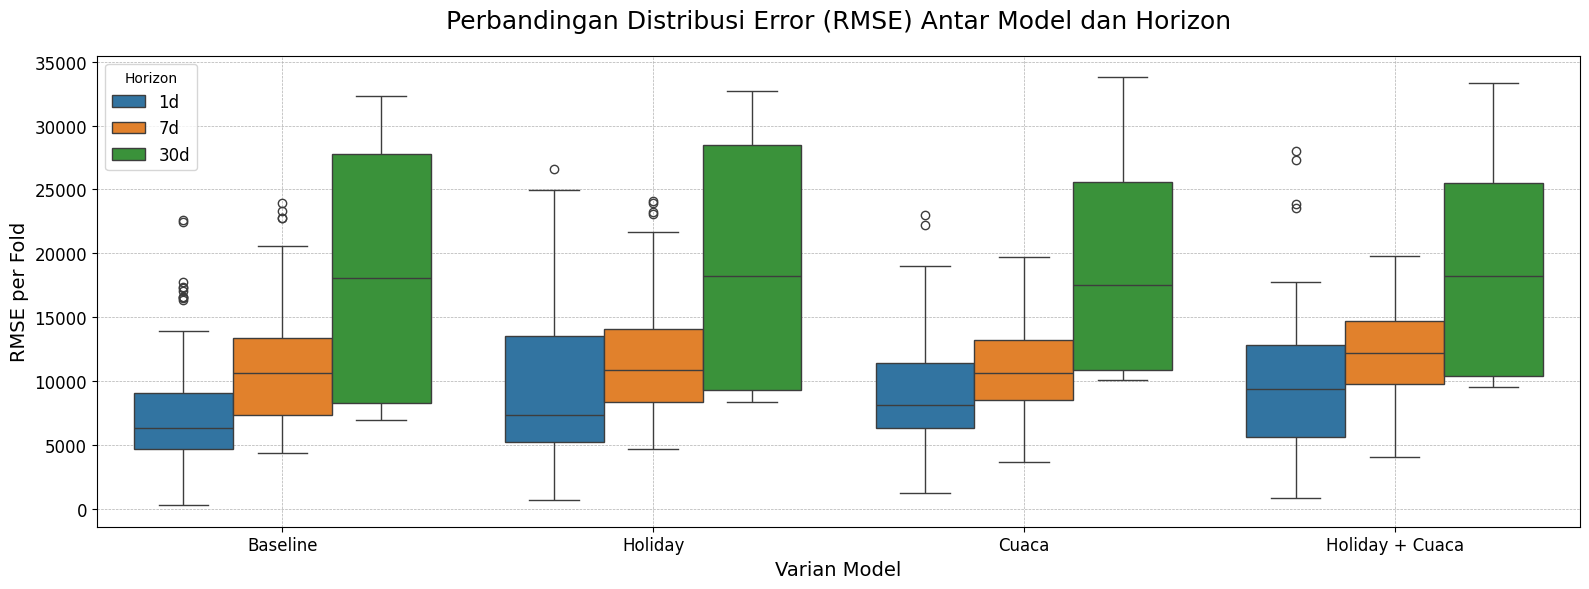

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsi: DataFrame `df_performance` sudah ada dari langkah sebelumnya
# dan berisi kolom 'RMSE', 'varian', dan 'horizon'.

print("--- Membuat Boxplot Perbandingan Performa RMSE ---")

# Menyiapkan kanvas plot yang lebih besar agar mudah dibaca
plt.figure(figsize=(16, 6))

# Menentukan urutan yang logis untuk ditampilkan di sumbu-x dan legenda
# Sesuaikan urutan ini jika perlu
varian_order = [
    "Baseline",
    "Holiday",
    "Cuaca",
    "Holiday + Cuaca"
]
horizon_order = ["1d", "7d", "30d"]

# Membuat boxplot dengan Seaborn
# x = Varian model
# y = Nilai RMSE yang akan dianalisis distribusinya
# hue = Pembeda warna berdasarkan horizon
sns.boxplot(
    data=df_performance, 
    x='varian', 
    y='RMSE', 
    hue='horizon',
    order=varian_order,
    hue_order=horizon_order,
    # fill=True 
)

# --- Mempercantik Plot ---
# Menambahkan judul dan label
plt.title('Perbandingan Distribusi Error (RMSE) Antar Model dan Horizon', fontsize=18, pad=20)
plt.xlabel('Varian Model', fontsize=14)
plt.ylabel('RMSE per Fold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid untuk kemudahan membaca
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Horizon', fontsize=12)

# Mengatur layout dan menyimpan gambar
plt.tight_layout()
plt.savefig("boxplot_perbandingan_model.png", dpi=300)

# Menampilkan plot
plt.show()

# Uji Friedman Horizon 1

In [53]:
import pandas as pd
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import warnings

# Pilih horizon dan metrik yang ingin diuji
target_horizon = '1d'     # Bisa diganti ke '7d' atau '30d'
target_metric = 'RMSE'    # Bisa diganti ke 'MAPE'

print(f"--- Memulai Uji Friedman untuk Horizon {target_horizon.upper()} ---")

# Filter dan persiapan data
df_h = df_performance[df_performance['horizon'] == target_horizon].dropna(subset=[target_metric])
print(f"Menggunakan {df_h['cutoff'].nunique()} fold / cutoff unik, total {len(df_h)} baris.\n")

# Pivot ke format wide untuk uji Friedman
pivoted = df_h.pivot(index='cutoff', columns='varian', values=target_metric)
data_columns = [pivoted[col] for col in pivoted.columns]

# Langkah 1: Uji Friedman
stat, p_value = friedmanchisquare(*data_columns)
print("--- Hasil Uji Friedman ---")
print(f"Statistik Uji = {stat:.8f}")
print(f"p-value       = {p_value:.8f}")

# Jika signifikan, lanjut ke post-hoc
if p_value < 0.05:
    print("\n📌 Kesimpulan: Terdapat perbedaan performa yang signifikan antar model.\n")

    # Langkah 2: Uji Nemenyi
    print("🔍 Uji Post-Hoc Nemenyi:")
    try:
        p_nemenyi = sp.posthoc_nemenyi_friedman(pivoted)
        print("📊 Tabel p-value dari Uji Nemenyi (nilai < 0.05 → beda signifikan):")
        display(p_nemenyi)
    except Exception as e:
        warnings.warn(f"Gagal menjalankan uji Nemenyi: {e}")
        p_nemenyi = None

    # Langkah 3: Uji Dunn (FDR)
    print("\n🔍 Uji Post-Hoc Dunn (dengan koreksi Benjamini-Hochberg):")
    df_dunn = df_h[['varian', target_metric]].rename(columns={
        'varian': 'group',
        target_metric: 'value'
    })

    try:
        p_dunn = sp.posthoc_dunn(df_dunn, val_col='value', group_col='group', p_adjust='fdr_bh')
        print("📊 Tabel p-value dari Uji Dunn (nilai < 0.05 → beda signifikan):")
        display(p_dunn)
    except Exception as e:
        warnings.warn(f"Gagal menjalankan uji Dunn: {e}")
        p_dunn = None

    # Langkah 4: Ranking rata-rata
    ranking_wide = pivoted.rank(axis=1, method='average')
    mean_ranks = ranking_wide.mean().sort_values()
    print("\n📈 Rata-rata Ranking Model:")
    print(mean_ranks)

    best_model = mean_ranks.idxmin()
    print(f"\n✅ Model dengan performa terbaik berdasarkan ranking rata-rata: **{best_model}**")

else:
    print("\n❎ Kesimpulan: Tidak terdapat cukup bukti untuk menyatakan adanya perbedaan performa yang signifikan antar model.")


--- Memulai Uji Friedman untuk Horizon 1D ---
Menggunakan 61 fold / cutoff unik, total 244 baris.

--- Hasil Uji Friedman ---
Statistik Uji = 16.84918033
p-value       = 0.00075905

📌 Kesimpulan: Terdapat perbedaan performa yang signifikan antar model.

🔍 Uji Post-Hoc Nemenyi:
📊 Tabel p-value dari Uji Nemenyi (nilai < 0.05 → beda signifikan):


,Baseline,Cuaca,Holiday,Holiday + Cuaca
Baseline,1.000000,0.371209,0.001975,0.004242
Cuaca,0.371209,1.000000,0.201887,0.296215
Holiday,0.001975,0.201887,1.000000,0.996710
Holiday + Cuaca,0.004242,0.296215,0.996710,1.000000



🔍 Uji Post-Hoc Dunn (dengan koreksi Benjamini-Hochberg):
📊 Tabel p-value dari Uji Dunn (nilai < 0.05 → beda signifikan):


,Baseline,Cuaca,Holiday,Holiday + Cuaca
Baseline,1.000000,0.244984,0.244984,0.240064
Cuaca,0.244984,1.000000,0.986696,0.746784
Holiday,0.244984,0.986696,1.000000,0.746784
Holiday + Cuaca,0.240064,0.746784,0.746784,1.000000



📈 Rata-rata Ranking Model:
varian
Baseline           2.000000
Cuaca              2.377049
Holiday + Cuaca    2.786885
Holiday            2.836066
dtype: float64

✅ Model dengan performa terbaik berdasarkan ranking rata-rata: **Baseline**


# Uji Friedman Horizon 7

In [54]:
import pandas as pd
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import warnings

# Pilih horizon dan metrik yang ingin diuji
target_horizon = '7d'     # Bisa diganti ke '7d' atau '30d'
target_metric = 'RMSE'    # Bisa diganti ke 'MAPE'

print(f"--- Memulai Uji Friedman untuk Horizon {target_horizon.upper()} ---")

# Filter dan persiapan data
df_h = df_performance[df_performance['horizon'] == target_horizon].dropna(subset=[target_metric])
print(f"Menggunakan {df_h['cutoff'].nunique()} fold / cutoff unik, total {len(df_h)} baris.\n")

# Pivot ke format wide untuk uji Friedman
pivoted = df_h.pivot(index='cutoff', columns='varian', values=target_metric)
data_columns = [pivoted[col] for col in pivoted.columns]

# Langkah 1: Uji Friedman
stat, p_value = friedmanchisquare(*data_columns)
print("--- Hasil Uji Friedman ---")
print(f"Statistik Uji = {stat:.8f}")
print(f"p-value       = {p_value:.8f}")

# Jika signifikan, lanjut ke post-hoc
if p_value < 0.05:
    print("\n📌 Kesimpulan: Terdapat perbedaan performa yang signifikan antar model.\n")

    # Langkah 2: Uji Nemenyi
    print("🔍 Uji Post-Hoc Nemenyi:")
    try:
        p_nemenyi = sp.posthoc_nemenyi_friedman(pivoted)
        print("📊 Tabel p-value dari Uji Nemenyi (nilai < 0.05 → beda signifikan):")
        display(p_nemenyi)
    except Exception as e:
        warnings.warn(f"Gagal menjalankan uji Nemenyi: {e}")
        p_nemenyi = None

    # Langkah 3: Uji Dunn (FDR)
    print("\n🔍 Uji Post-Hoc Dunn (dengan koreksi Benjamini-Hochberg):")
    df_dunn = df_h[['varian', target_metric]].rename(columns={
        'varian': 'group',
        target_metric: 'value'
    })

    try:
        p_dunn = sp.posthoc_dunn(df_dunn, val_col='value', group_col='group', p_adjust='fdr_bh')
        print("📊 Tabel p-value dari Uji Dunn (nilai < 0.05 → beda signifikan):")
        display(p_dunn)
    except Exception as e:
        warnings.warn(f"Gagal menjalankan uji Dunn: {e}")
        p_dunn = None

    # Langkah 4: Ranking rata-rata
    ranking_wide = pivoted.rank(axis=1, method='average')
    mean_ranks = ranking_wide.mean().sort_values()
    print("\n📈 Rata-rata Ranking Model:")
    print(mean_ranks)

    best_model = mean_ranks.idxmin()
    print(f"\n✅ Model dengan performa terbaik berdasarkan ranking rata-rata: **{best_model}**")

else:
    print("\n❎ Kesimpulan: Tidak terdapat cukup bukti untuk menyatakan adanya perbedaan performa yang signifikan antar model.")


--- Memulai Uji Friedman untuk Horizon 7D ---
Menggunakan 55 fold / cutoff unik, total 220 baris.

--- Hasil Uji Friedman ---
Statistik Uji = 14.84727273
p-value       = 0.00195193

📌 Kesimpulan: Terdapat perbedaan performa yang signifikan antar model.

🔍 Uji Post-Hoc Nemenyi:
📊 Tabel p-value dari Uji Nemenyi (nilai < 0.05 → beda signifikan):


,Baseline,Cuaca,Holiday,Holiday + Cuaca
Baseline,1.000000,0.848647,0.451394,0.031902
Cuaca,0.848647,1.000000,0.100431,0.002221
Holiday,0.451394,0.100431,1.000000,0.591374
Holiday + Cuaca,0.031902,0.002221,0.591374,1.000000



🔍 Uji Post-Hoc Dunn (dengan koreksi Benjamini-Hochberg):
📊 Tabel p-value dari Uji Dunn (nilai < 0.05 → beda signifikan):


,Baseline,Cuaca,Holiday,Holiday + Cuaca
Baseline,1.000000,0.951029,0.819109,0.496263
Cuaca,0.951029,1.000000,0.819109,0.496263
Holiday,0.819109,0.819109,1.000000,0.656012
Holiday + Cuaca,0.496263,0.496263,0.656012,1.000000



📈 Rata-rata Ranking Model:
varian
Cuaca              2.090909
Baseline           2.290909
Holiday            2.654545
Holiday + Cuaca    2.963636
dtype: float64

✅ Model dengan performa terbaik berdasarkan ranking rata-rata: **Cuaca**


# Uji Friedman Horizon 30

In [55]:
import pandas as pd
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import warnings

# Pilih horizon dan metrik yang ingin diuji
target_horizon = '30d'     # Bisa diganti ke '7d' atau '30d'
target_metric = 'RMSE'    # Bisa diganti ke 'MAPE'

print(f"--- Memulai Uji Friedman untuk Horizon {target_horizon.upper()} ---")

# Filter dan persiapan data
df_h = df_performance[df_performance['horizon'] == target_horizon].dropna(subset=[target_metric])
print(f"Menggunakan {df_h['cutoff'].nunique()} fold / cutoff unik, total {len(df_h)} baris.\n")

# Pivot ke format wide untuk uji Friedman
pivoted = df_h.pivot(index='cutoff', columns='varian', values=target_metric)
data_columns = [pivoted[col] for col in pivoted.columns]

# Langkah 1: Uji Friedman
stat, p_value = friedmanchisquare(*data_columns)
print("--- Hasil Uji Friedman ---")
print(f"Statistik Uji = {stat:.8f}")
print(f"p-value       = {p_value:.8f}")

# Jika signifikan, lanjut ke post-hoc
if p_value < 0.05:
    print("\n📌 Kesimpulan: Terdapat perbedaan performa yang signifikan antar model.\n")

    # Langkah 2: Uji Nemenyi
    print("🔍 Uji Post-Hoc Nemenyi:")
    try:
        p_nemenyi = sp.posthoc_nemenyi_friedman(pivoted)
        print("📊 Tabel p-value dari Uji Nemenyi (nilai < 0.05 → beda signifikan):")
        display(p_nemenyi)
    except Exception as e:
        warnings.warn(f"Gagal menjalankan uji Nemenyi: {e}")
        p_nemenyi = None

    # Langkah 3: Uji Dunn (FDR)
    print("\n🔍 Uji Post-Hoc Dunn (dengan koreksi Benjamini-Hochberg):")
    df_dunn = df_h[['varian', target_metric]].rename(columns={
        'varian': 'group',
        target_metric: 'value'
    })

    try:
        p_dunn = sp.posthoc_dunn(df_dunn, val_col='value', group_col='group', p_adjust='fdr_bh')
        print("📊 Tabel p-value dari Uji Dunn (nilai < 0.05 → beda signifikan):")
        display(p_dunn)
    except Exception as e:
        warnings.warn(f"Gagal menjalankan uji Dunn: {e}")
        p_dunn = None

    # Langkah 4: Ranking rata-rata
    ranking_wide = pivoted.rank(axis=1, method='average')
    mean_ranks = ranking_wide.mean().sort_values()
    print("\n📈 Rata-rata Ranking Model:")
    print(mean_ranks)

    best_model = mean_ranks.idxmin()
    print(f"\n✅ Model dengan performa terbaik berdasarkan ranking rata-rata: **{best_model}**")

else:
    print("\n❎ Kesimpulan: Tidak terdapat cukup bukti untuk menyatakan adanya perbedaan performa yang signifikan antar model.")


--- Memulai Uji Friedman untuk Horizon 30D ---
Menggunakan 32 fold / cutoff unik, total 128 baris.

--- Hasil Uji Friedman ---
Statistik Uji = 10.95000000
p-value       = 0.01199934

📌 Kesimpulan: Terdapat perbedaan performa yang signifikan antar model.

🔍 Uji Post-Hoc Nemenyi:
📊 Tabel p-value dari Uji Nemenyi (nilai < 0.05 → beda signifikan):


,Baseline,Cuaca,Holiday,Holiday + Cuaca
Baseline,1.000000,0.057253,0.010494,0.143534
Cuaca,0.057253,1.000000,0.937842,0.980268
Holiday,0.010494,0.937842,1.000000,0.767542
Holiday + Cuaca,0.143534,0.980268,0.767542,1.000000



🔍 Uji Post-Hoc Dunn (dengan koreksi Benjamini-Hochberg):
📊 Tabel p-value dari Uji Dunn (nilai < 0.05 → beda signifikan):


,Baseline,Cuaca,Holiday,Holiday + Cuaca
Baseline,1.0000,0.8609,0.8609,0.8609
Cuaca,0.8609,1.0000,0.8609,0.8609
Holiday,0.8609,0.8609,1.0000,0.8609
Holiday + Cuaca,0.8609,0.8609,0.8609,1.0000



📈 Rata-rata Ranking Model:
varian
Baseline           1.8750
Holiday + Cuaca    2.5625
Cuaca              2.6875
Holiday            2.8750
dtype: float64

✅ Model dengan performa terbaik berdasarkan ranking rata-rata: **Baseline**
